- 기존 캐글 노트북 코드 https://www.kaggle.com/code/khyeh0719/ptb-xl-dataset-wrangling
- 멘토님께서 주신 PTB 가이드라인 코드파일
- 멘토님께서 주신 SPH 가이드라인 코드 파일 


In [ ]:
!pip install wfdb

# 1. EDA

## 1-1라이브러리 임포트 

In [1]:
# 필요한 라이브러리를 임포트합니다.
import pandas as pd  # 데이터 조작 및 분석을 위한 라이브러리
import numpy as np  # 수치 계산을 위한 라이브러리
import wfdb  # 심전도 데이터를 읽기 위한 라이브러리
import ast  # 문자열 형태의 파이썬 표현식을 파싱하기 위한 라이브러리
from tqdm import tqdm  # 반복 작업의 진행 상황을 시각적으로 표시하기 위한 라이브러리
import warnings; warnings.filterwarnings('ignore')  # 경고 메시지를 무시하기 위한 설정
from IPython.display import display  # Jupyter 노트북에서 데이터를 깔끔하게 보여주기 위한 함수
from glob import glob # 하위 디렉토리에 파일을 가져와서 다루기위한 라이브러리 
import os # 현재 워킹디렉토리의 경로와 파일을 다루기 위한 라이브러리 
import h5py #.h5파일을 다루기 위한 라이브러리 

# 데이터 시각화를 위한 라이브러리를 임포트합니다.
import matplotlib.pyplot as plt  # 그래프를 그리기 위한 라이브러리
import seaborn as sns  # matplotlib 기반의 고급 시각화 라이브러리
%matplotlib inline  # 노트북 안에서 그래프를 바로 볼 수 있게 설정

UsageError: unrecognized arguments: # 노트북 안에서 그래프를 바로 볼 수 있게 설정


## 1-2데이터 읽어오기 

### wfdb 패키지 설치 
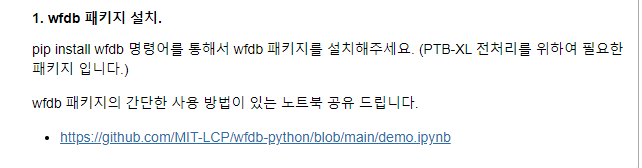



https://github.com/MIT-LCP/wfdb-python/blob/main/demo.ipynb

###  metadata 읽기

다운로드 받은 PTB-XL 데이터에는 ptbxl_database.csv 파일이 있습니다.

해당 csv 파일을 pandas를 이용하여 열면, 맨 마지막 두개의 컬럼 filename_lr, filename_hr이 있습니다.

filename_lr은 100Hz로 저장되어 있는 신호 데이터 파일 경로이고, filename_hr은 500Hz로 저장되어 있는 신호 데이터 파일 경로입니다.

저희는 500Hz로 수집된 데이터를 사용할 것이기 때문에 filename_hr 컬럼의 경로를 이용하여 데이터를 읽으면 됩니다.

In [2]:
path=r"C:\Users\Administrator\Desktop\harbud\ecg"

In [4]:
df_ptb=pd.read_csv(path+'\ptbxl_database.csv', index_col='ecg_id')

In [6]:
df_ptb.head()

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr


### 파일 리스트 불러오기 및 sph 메타 데이터 읽기 

위의 '데이터 준비'에서 안내드린대로 SPH 폴더 내에 .h5 파일들을 저장해놓고, glob을 이용하여 .h5 파일 리스트를 모두 가져오겠습니다.

아래 코드에 sorted를 이용하여 파일명을 정렬하였는데, 이 부분은 필수로 들어가야 하는 부분입니다. 반드시 포함하여 실행해주세요.

In [9]:
filenames = sorted(glob(r"sph_data\records_sph\*.h5"))

In [10]:
filenames

['sph_data\\records_sph\\A00001.h5',
 'sph_data\\records_sph\\A00002.h5',
 'sph_data\\records_sph\\A00003.h5',
 'sph_data\\records_sph\\A00004.h5',
 'sph_data\\records_sph\\A00005.h5',
 'sph_data\\records_sph\\A00006.h5',
 'sph_data\\records_sph\\A00007.h5',
 'sph_data\\records_sph\\A00008.h5',
 'sph_data\\records_sph\\A00009.h5',
 'sph_data\\records_sph\\A00010.h5',
 'sph_data\\records_sph\\A00011.h5',
 'sph_data\\records_sph\\A00012.h5',
 'sph_data\\records_sph\\A00013.h5',
 'sph_data\\records_sph\\A00014.h5',
 'sph_data\\records_sph\\A00015.h5',
 'sph_data\\records_sph\\A00016.h5',
 'sph_data\\records_sph\\A00017.h5',
 'sph_data\\records_sph\\A00018.h5',
 'sph_data\\records_sph\\A00019.h5',
 'sph_data\\records_sph\\A00020.h5',
 'sph_data\\records_sph\\A00021.h5',
 'sph_data\\records_sph\\A00022.h5',
 'sph_data\\records_sph\\A00023.h5',
 'sph_data\\records_sph\\A00024.h5',
 'sph_data\\records_sph\\A00025.h5',
 'sph_data\\records_sph\\A00026.h5',
 'sph_data\\records_sph\\A00027.h5',
 

In [11]:
df_sph = pd.read_csv(r"C:\Users\Administrator\Desktop\harbud\ecg\sph_data\records_sph\metadata.csv") ## 동일한 폴더에 저장되어 있는 metadata.csv파일을 pandas 데이터 프레임으로 읽기

In [12]:
df_sph ['filename'] = filenames # df안에 filename이라는 컬럼을 추가 하여 glob으로 읽어온 파일명들을 저장

In [13]:
os.getcwd() # 현재 작업 디렉토리 가져오기 

'C:\\Users\\Administrator\\Desktop\\harbud\\ecg'

In [14]:
df_sph[['ECG_ID','filename']]

,ECG_ID,filename
0,A00001,sph_data\records_sph\A00001.h5
1,A00002,sph_data\records_sph\A00002.h5
2,A00003,sph_data\records_sph\A00003.h5
3,A00004,sph_data\records_sph\A00004.h5
4,A00005,sph_data\records_sph\A00005.h5
...,...,...
25765,A25766,sph_data\records_sph\A25766.h5
25766,A25767,sph_data\records_sph\A25767.h5
25767,A25768,sph_data\records_sph\A25768.h5
25768,A25769,sph_data\records_sph\A25769.h5


이때 ecg_id와 filename의 .h5파일명이 일치하는 지 반드시 확인할것 

### Load Raw Data - 1. ptb-xl 파일 읽기, 2. sph 파일 읽기

#### ptb 파일 읽기

In [2]:
# 원시 심전도 데이터를 로드하는 함수를 정의합니다.
def load_raw_data(df, sampling_rate, path):
    # 샘플링 레이트에 따라 로드할 파일을 결정합니다.
    if sampling_rate == 100:
        # tqdm을 사용하여 진행 상황을 시각적으로 표시하면서 낮은 해상도 데이터를 로드합니다.
        data = [wfdb.rdsamp(path+f) for f in tqdm(df.filename_lr)]
    else:
        # tqdm을 사용하여 진행 상황을 시각적으로 표시하면서 높은 해상도 데이터를 로드합니다.
        data = [wfdb.rdsamp(path+'\\'+f) for f in tqdm(df.filename_hr)]
    # 읽어온 데이터에서 신호 부분만 추출하여 넘파이 배열로 변환합니다.
    data = np.array([signal[:,0] for signal, meta in data]) # D이때 우리가 사용할 데이터는 lead1 이므로 [:0]을 붙여줍니다. 
    return data

In [3]:
# 데이터 경로를 설정합니다.
path2 = r"C:\Users\Administrator\Desktop\harbud\ecg\ptb_xl_data"

# 샘플링 레이트를 설정합니다. 우리는 500 hr을 사용합니다,
sampling_rate=500

# 메타데이터를 로드하고 전처리합니다.

Y = pd.read_csv(path2+'\\'+'ptbxl_database.csv', index_col='ecg_id')

# scp_codes 컬럼의 문자열을 파이썬 딕셔너리로 변환합니다. (중요)
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))  

# 앞서 정의한 함수를 사용하여 원시 신호 데이터를 로드합니다.
X = load_raw_data(Y, sampling_rate, path2)

print('data shape:', X.shape) # data shape: (21799,5000)
Y[['scp_codes']]
Y 

100%|████████████████████████████████████████████████████████████████████████████| 21799/21799 [04:59<00:00, 72.77it/s]


data shape: (21799, 5000)


,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,True,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr
21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr


In [4]:
X

array([[-0.115, -0.115, -0.115, ...,  0.21 ,  0.21 ,  0.21 ],
       [-0.015, -0.015, -0.015, ..., -0.055, -0.055, -0.055],
       [-0.035, -0.035, -0.035, ..., -0.04 , -0.04 , -0.04 ],
       ...,
       [ 0.09 ,  0.09 ,  0.09 , ..., -0.055, -0.055, -0.055],
       [-0.045, -0.045, -0.045, ...,  0.07 ,  0.07 ,  0.07 ],
       [-0.05 , -0.05 , -0.05 , ..., -0.07 , -0.07 , -0.07 ]])

In [5]:
Y

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,True,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr
21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr


In [6]:
print(X.shape,Y.shape)

(21799, 5000) (21799, 27)


In [3]:
df_ptb_lead1=pd.DataFrame(X)
df_ptb_lead1.to_csv

SyntaxError: unterminated string literal (detected at line 2) (3985897149.py, line 2)

In [8]:
df_ptb=Y
df_ptb

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,...,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr
ecg_id,,,,,,,,,,,,,,,,,,,,,
1,15709.0,56.0,1,NaN,63.0,2.0,0.0,CS-12 E,1984-11-09 09:17:34,sinusrhythmus periphere niederspannung,...,True,NaN,", I-V1,",NaN,NaN,NaN,NaN,3,records100/00000/00001_lr,records500/00000/00001_hr
2,13243.0,19.0,0,NaN,70.0,2.0,0.0,CS-12 E,1984-11-14 12:55:37,sinusbradykardie sonst normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,2,records100/00000/00002_lr,records500/00000/00002_hr
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,...,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr
4,17014.0,24.0,0,NaN,82.0,2.0,0.0,CS-12 E,1984-11-15 13:44:57,sinusrhythmus normales ekg,...,True,", II,III,AVF",NaN,NaN,NaN,NaN,NaN,3,records100/00000/00004_lr,records500/00000/00004_hr
5,17448.0,19.0,1,NaN,70.0,2.0,0.0,CS-12 E,1984-11-17 10:43:15,sinusrhythmus normales ekg,...,True,", III,AVR,AVF",NaN,NaN,NaN,NaN,NaN,4,records100/00000/00005_lr,records500/00000/00005_hr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21833,17180.0,67.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-31 09:14:35,ventrikulÄre extrasystole(n) sinustachykardie ...,...,True,NaN,", alles,",NaN,NaN,1ES,NaN,7,records100/21000/21833_lr,records500/21000/21833_hr
21834,20703.0,300.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-06-05 11:33:39,sinusrhythmus lagetyp normal qrs(t) abnorm ...,...,True,NaN,NaN,NaN,NaN,NaN,NaN,4,records100/21000/21834_lr,records500/21000/21834_hr
21835,19311.0,59.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-06-08 10:30:27,sinusrhythmus lagetyp normal t abnorm in anter...,...,True,NaN,", I-AVR,",NaN,NaN,NaN,NaN,2,records100/21000/21835_lr,records500/21000/21835_hr


위 코드와 아래의 코드는 같은 동작을 하는 코드이다. 

In [ ]:
filenames = df.filename_hr.tolist()
base_path = '/DATA4/afib-renew/raw/PTB-XL/'
signal, meta = wfdb.rdsamp(base_path + filenames[0])

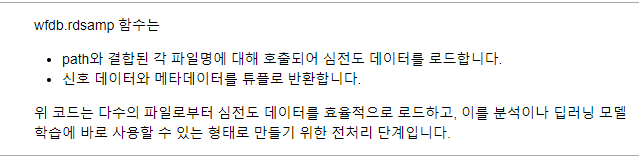

- scp_codes 컬럼에 있는 문자열을 ast.literal_eval 함수를 사용하여 안전하게 파이썬 딕셔너리로 변환합니다. 이 컬럼은 심전도 데이터에 대한 진단 코드를 포함하고 있으며, 문자열로 저장되어 있습니다.
- load_raw_data 함수를 호출하여 원시 신호 데이터를 로드합니다. 이 함수는 앞서 정의한 대로 실제 심전도 신호를 넘파이 배열 형태로 변환합니다.

#### sph 파일 읽기 

In [1]:
## sph 파일 읽기 
df_sph_file = df_sph.filename.tolist()[0]

with h5py.File(df_sph_file, 'r') as f:
    signal = f['ecg'][:].T

NameError: name 'df_sph' is not defined

In [ ]:

df_sph_file = df_sph.filename.tolist()
for i in tqdm(range(len(df_sph_file))):
    with h5py.File(df_sph_file[i], 'r') as f:
        signal = f['ecg'][:].T
        
       

 75%|████████████████████████████████████████████████████████▋                   | 19230/25770 [03:02<01:12, 90.51it/s]

In [57]:
signal

array([[ 0.0216,  0.0216,  0.0208, ...,  0.0576,  0.0552,  0.0504],
       [ 0.1304,  0.132 ,  0.132 , ...,  0.0376,  0.0384,  0.0352],
       [ 0.1088,  0.1096,  0.1112, ..., -0.02  , -0.016 , -0.0144],
       ...,
       [-0.0544, -0.0544, -0.0528, ..., -0.0248, -0.0288, -0.0344],
       [-0.0376, -0.0368, -0.0368, ..., -0.0216, -0.0216, -0.024 ],
       [-0.0624, -0.0624, -0.0624, ...,  0.    ,  0.0008,  0.0008]],
      dtype=float16)

In [52]:
lead1=signal[:,0]

In [54]:
lead1.shape

(5000,)

#### 데이터 읽을 때 주의사항 + 추가 구현해야 할 부분

SPH 데이터는 길이가 가변적입니다.

10초 데이터만 있는 것이 아니라, 더 긴 신호가 저장되어 있을 수 있습니다.

따라서, 10초보다 긴 데이터의 경우 랜덤하게 10초를 샘플링하여 저장해주시면 됩니다.

아래와 같이 샘플 코드를 이용하시면 되겠습니다.

#### 우리팀에서는

- 500Hz 고해상도 데이터 사용 예정임. 

- 12개의 Lead 데이터라고 불리는데, 각 Lead의 이름은 다음과 같습니다.
        - 'I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'
- 이 가운데, 우리는 Lead I 을 사용할 것입니다. 이는 갤럭시 워치나 애플 워치와 같이 두 팔에서 수집된 신호 데이터 입니다.
- 따라서, 5000x12 shape의 array에서 Lead I에 해당되는 5000개의 데이터만 저장해서 최종 저장 데이터 array의 shape은 (N, 5000)이 되어야 함.

In [ ]:
# 데이터의 길이가 정확히 5000개인 경우
if lead1.shape[0] == 5000:
    lead1 = lead1 # 그대로 저장
# 데이터의 길이가 5000보다 큰 경우, 연속적인 5000개의 데이터를 랜덤하게 선택
else:
    start_idx = np.random.randint(0, lead1.shape[0] - 4999)  # 마지막 5000개를 포함할 수 있도록 인덱스 설정
    lead1 = lead1[start_idx:start_idx+5000, :]

## 1-4 Load Data for Heart Beat Diagnostic 
- 이 단계는 데이터 분석에서 중요한 진단 코드를 선별하고, 이를 이용하여 데이터셋 내의 각 심전도 레코드가 어떤 진단적 특성을 가지는지 파악하는 데 필요합니다. 이 정보는 후에 심전도 데이터의 레이블로 사용되거나, 데이터를 더 잘 이해하기 위한 탐색적 데이터 분석에 활용될 수 있습니다.

In [ ]:
# SCP-ECG 진단 파일을 로드합니다.
path3=r"C:\Users\Administrator\Desktop\harbud\ecg
agg_df = pd.read_csv(path3+'\'+'scp_statements.csv', index_col=0)

# diagnostic 컬럼 값이 1인 행만 선택합니다. 1 외에는 비어있는 행만 있음.
agg_df = agg_df[agg_df.diagnostic == 1]

print(agg_df.shape) # (44, 12)
agg_df.head()

- 아래 과정을 통해 각 심전도 레코드가 여러 상위 진단 클래스에 속할 수 있는지 파악하고, 다중 라벨 분류 문제에 대한 이해를 돕거나, 후속 분석 및 모델링 작업을 위한 데이터 준비를 합니다.

In [ ]:
# SCP-ECG 진단 코드를 상위 클래스로 집계하는 함수를 정의합니다.
def aggregate_supclass_diagnostic(y_dic):
    tmp = []  
    for key in y_dic.keys():  # 주어진 진단 코드의 키들을 순회합니다.
        if key in agg_df.index:  # 만약 키가 agg_df의 인덱스에 존재한다면,
            # 해당 진단 코드의 상위 클래스를 임시 리스트에 추가합니다.
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))  # 중복을 제거한 리스트를 반환합니다.
    
# 각 심전도 레코드에 대한 진단 코드를 상위 클래스로 집계하여 새로운 컬럼에 저장합니다.
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_supclass_diagnostic)

# 각 레코드의 상위 진단 클래스 개수를 저장하는 새로운 컬럼을 추가합니다.
Y['diagnostic_superclass_len'] = Y['diagnostic_superclass'].apply(len)

# 상위 진단 클래스가 여러 개인 레코드를 선택하여 출력합니다.
Y.loc[Y.diagnostic_superclass_len > 1, 'diagnostic_superclass']

### Number of Superclass per ECG record


In [ ]:
# 상위 진단 클래스 개수에 대한 값의 분포를 구합니다.
vc = Y['diagnostic_superclass_len'].value_counts()

# seaborn의 스타일을 설정합니다. 여기서는 'whitegrid' 스타일을 사용합니다.
sns.set_style("whitegrid")
# 바 차트를 그리기 위한 플롯을 초기화합니다.
bar, ax = plt.subplots(figsize=(10,6))
# 바 차트를 그립니다. 각 바의 길이는 전체 샘플에 대한 백분율로 표시됩니다.
ax = sns.barplot(x=vc.values/vc.values.sum()*100., y=vc.index, ci=None, palette="muted", orient='h')

ax.set_title("Diagnostic Superclass Len Distribution", fontsize=20)
ax.set_xlabel("Percentage Over All Samples")
ax.set_ylabel("Diagnostic Superclass Length")

# 각 바에 텍스트를 추가하여 백분율을 표시합니다.
for rect in ax.patches:
    ax.text(rect.get_width(), rect.get_y() + rect.get_height() / 2, "%.1f%%" % rect.get_width(), weight='bold')

- NORM: 정상 심전도
- MI: 심근경색, 흔히 심장마비로 알려진 심근경색(MI)은 심장 일부에 혈류가 감소하거나 중단되어 심장 근육에 손상을 일으킬 때 발생합니다
- STTC: ST/T 변화, ST 및 T파 변화는 심장 병리를 나타내거나 정상적인 변형일 수 있습니다. 따라서 이 소견의 해석은 임상적 맥락과 이전 심전도에서 유사한 소견이 있었는지에 따라 달라집니다
- CD: 전도 장애. 심장 리듬은 심장이 뛰는 방식입니다. 전도는 전기 자극이 심장을 통해 이동하여 심장을 뛰게 하는 방식입니다. 일부 전도 장애는 부정맥 또는 불규칙한 심장 박동을 유발할 수 있습니다.
- HYP: 비대증, 비후성 심근증(HCM)은 심장 근육이 비정상적으로 두꺼워지는(비대해지는) 질환입니다. 심장 근육이 두꺼워지면 심장이 혈액을 펌프질하기가 더 어려워질 수 있습니다.

### Number of Subclass per ECG record
- 이 과정은 특정 심전도 레코드가 여러 하위 진단 클래스를 가지는지를 파악하고, 이 정보를 통해 더 세분화된 분석을 수행하거나 다중 라벨 분류 문제를 해결하는 데 도움이 됩니다.

In [ ]:
# SCP-ECG 진단 코드를 하위 클래스로 집계하는 함수를 정의합니다.
def aggregate_subclass_diagnostic(y_dic):
    tmp = []  # 임시 리스트를 생성합니다.
    for key in y_dic.keys():  # 주어진 진단 코드의 키들을 순회합니다.
        if key in agg_df.index:  # 만약 키가 agg_df의 인덱스에 존재한다면,
            # 해당 진단 코드의 하위 클래스를 임시 리스트에 추가합니다.
            tmp.append(agg_df.loc[key].diagnostic_subclass)
    ret = list(set(tmp))  # 중복을 제거한 리스트를 생성합니다.
    ret = ['sub_'+r for r in ret]  # 하위 클래스와 상위 클래스 컬럼을 구별하기 위해 접두사를 추가합니다.
    return ret

# 각 심전도 레코드에 대한 진단 코드를 하위 클래스로 집계하여 새로운 컬럼에 저장합니다.
Y['diagnostic_subclass'] = Y.scp_codes.apply(aggregate_subclass_diagnostic)

# 각 레코드의 하위 진단 클래스 개수를 저장하는 새로운 컬럼을 추가합니다.
Y['diagnostic_subclass_len'] = Y['diagnostic_subclass'].apply(len)

# 하위 진단 클래스가 여러 개인 레코드를 선택하여 출력합니다.
Y.loc[Y.diagnostic_subclass_len > 1, 'diagnostic_subclass']

In [ ]:
# 하위 진단 클래스 개수에 대한 값의 분포를 구합니다.
vc = Y['diagnostic_subclass_len'].value_counts()

sns.set_style("whitegrid")
bar,ax = plt.subplots(figsize=(10,6))

# 바 차트를 그립니다. 각 바의 길이는 전체 샘플에 대한 백분율로 표시됩니다.
ax = sns.barplot(x=vc.values/vc.values.sum()*100., y=vc.index, ci=None, palette="muted",orient='h' )

ax.set_title("Diagnostic Subclass Length Distribution", fontsize=20)
ax.set_xlabel ("percentage over all samples")
ax.set_ylabel ("diagnostic_subclass_len")

for rect in ax.patches:
    ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

#### 우리팀에서는
- diagnostic 값이 없는 'AFIB(심박세동)' 코드가 진단코드 리스트안에 있는지 확인해서 있으면 1, 없으면 0으로 라벨링 해야한다.
- 두 CSV 파일(ptbxl_database, scp_statements)에 들어있는 컬럼 및 데이터 모두 빨리 외워야하지 않을까.

## 데이터 컬럼설명 
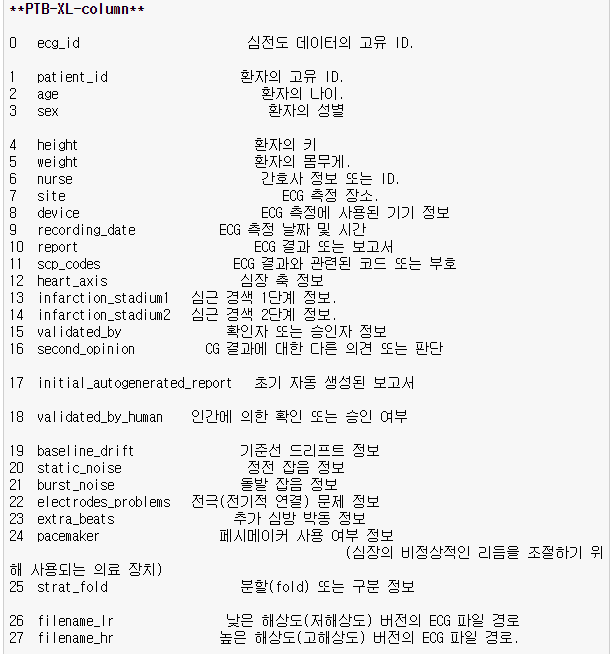

# 2. labeling


## 2-1 ptb-xl의 라벨링


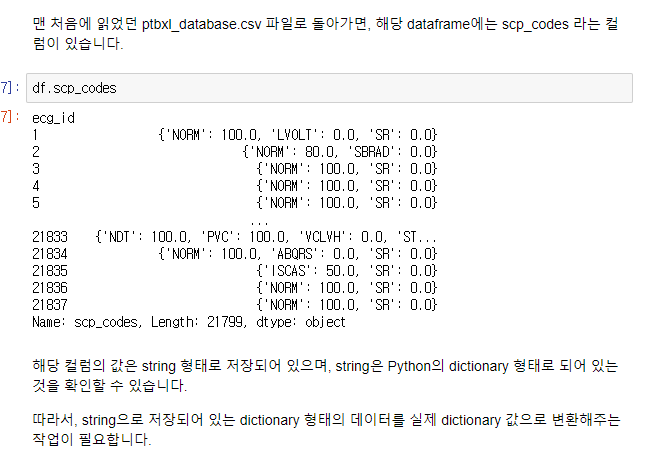

df.scp_codes = df.scp_codes.apply(lambda x: ast.literal_eval(x))
-  위 명령어를 실행하여 scp_codes 컬럼의 각 rpw를 실제 dictionary 값으로 변환해야한다. 
- 우리는 위에서 했다. 

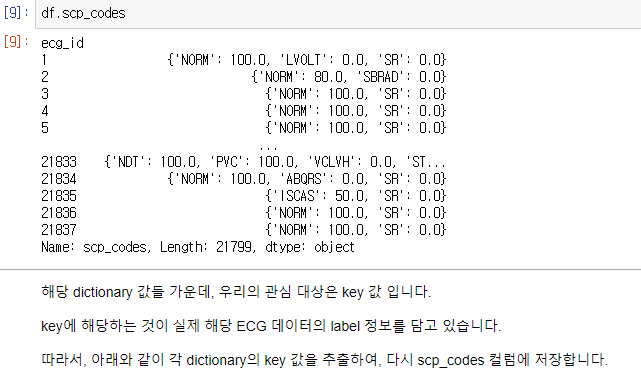

In [ ]:
df.scp_codes = df.scp_codes.apply(lambda x: list(x.keys()))

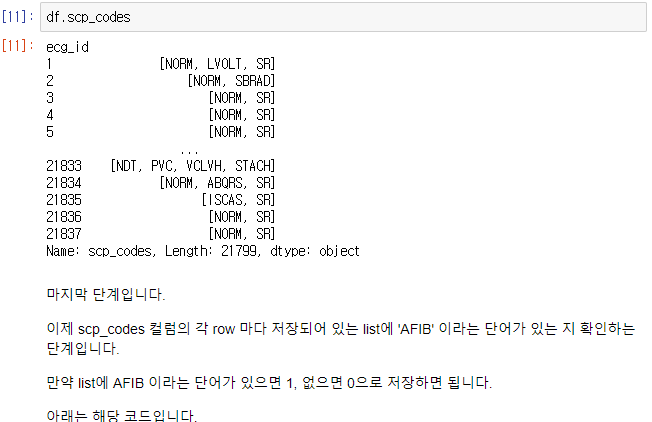

In [ ]:
df['label'] = df.scp_codes.apply(lambda arr: 1 if 'AFIB' in arr else 0)

In [ ]:
df.label.value_counts()

Non-AFIB이 20,285개, AFIB이 1,514개로 출력된 것을 확인하였다면, 제대로 labeling이 된 것입니다.

In [ ]:
# 데이터 저장 샘플 코드 (다른 데이터 형태로 저장하셔도 무방합니다. 편한 방법을 선택하세요.)
# np.save('/DATA4/afib-renew/processed/PTB-XL-X.npy', X)
# np.save('/DATA4/afib-renew/processed/PTB-XL-Y.npy', Y)

## 2-2 SPH의 라벨링

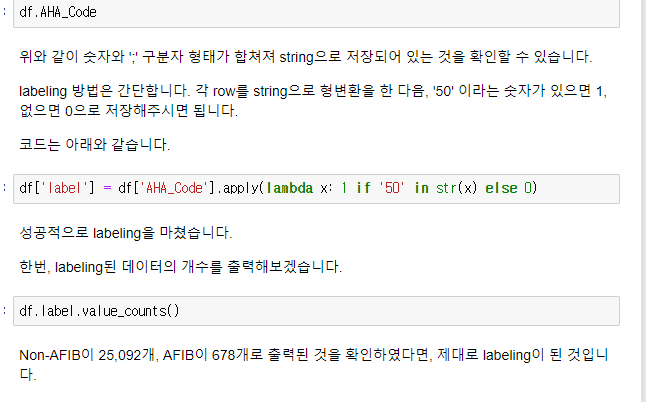